In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
salary_test = pd.read_csv("C:\\Users\\Nik\\Downloads\\SalaryData_Test(1).csv")

In [ ]:
salary_train = pd.read_csv("C:\\Users\\Nik\\Downloads\\SalaryData_Train(1).csv")

In [ ]:
salary_test.head(10)

In [ ]:
salary_train.head(10)

In [11]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
age              15060 non-null int64
workclass        15060 non-null object
education        15060 non-null object
educationno      15060 non-null int64
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null int64
native           15060 non-null object
Salary           15060 non-null object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
salary_train.head

<bound method NDFrame.head of        age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

         

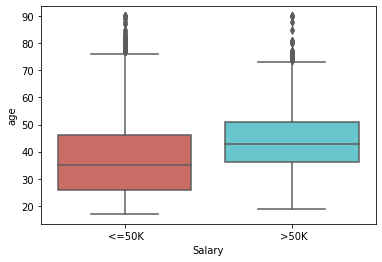

In [14]:
sns.boxplot(x="Salary",y="age",data=salary_test,palette = "hls")

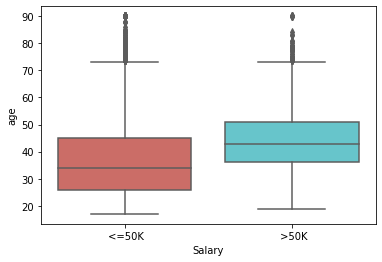

In [15]:
sns.boxplot(x="Salary",y="age",data=salary_train,palette = "hls")

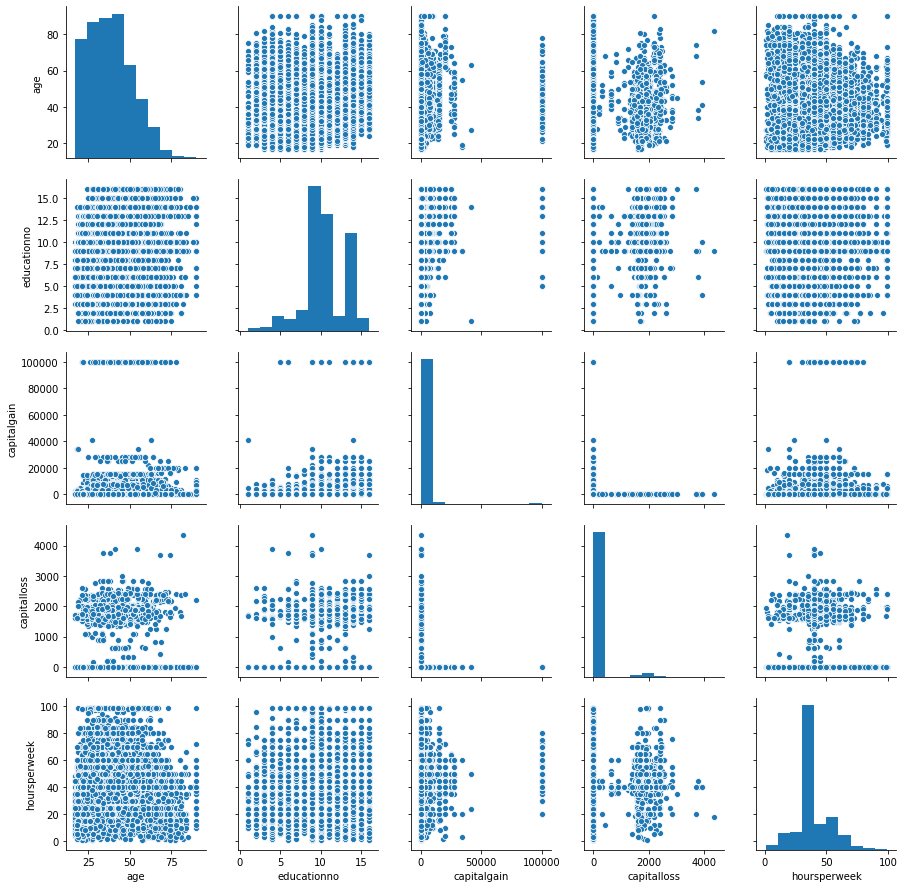

In [16]:
sns.pairplot(data=salary_train)


In [17]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
# Again, let's see how many unique categories we have in this property
#salary_set = set(salary_test['Salary'])
#print(salary_set)
#another way
salary_test['Salary'].unique()


array([' <=50K', ' >50K'], dtype=object)

In [19]:
#Mapping for test data
#salary_test['Salary']=salary_test['Salary'].astype(int)
#salary_test.Salary.fillna(-99)
#salary_test['Salary'].dtypes
salary_test['Salary'] = salary_test['Salary'].map({' >50K': 0,' <=50K': 1})


In [20]:
#Mapping for train data
salary_train['Salary'] = salary_train['Salary'].map({' >50K': 0,' <=50K': 1})

In [21]:
#check data type of test data
salary_test['Salary'].dtype


dtype('int64')

In [22]:
#check data type of train data
salary_train['Salary'].dtype

dtype('int64')

In [23]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,1


In [24]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [25]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null int64
dtypes: int64(6), object(8)
memory usage: 3.2+ MB


In [26]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [27]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [28]:
train =salary_train[['age','educationno','capitalgain','capitalloss','hoursperweek','Salary']]

In [29]:
train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,2174,0,40,1
1,50,13,0,0,13,1
2,38,9,0,0,40,1
3,53,7,0,0,40,1
4,28,13,0,0,40,1


In [30]:
test =salary_test[['age','educationno','capitalgain','capitalloss','hoursperweek','Salary']]

In [31]:
test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,0,0,40,1
1,38,9,0,0,50,1
2,28,12,0,0,40,0
3,44,10,7688,0,40,0
4,34,6,0,0,30,1


In [ ]:
from sklearn.svm import SVC
#from sklearn.model_selection import train_test_split
#X_train, x_test, Y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=0)


In [47]:
train_X = train.iloc[:,0:5]
train_y = train.iloc[:,5]
test_X  = test.iloc[:,0:5]
test_y  = test.iloc[:,5]


In [37]:
test_X.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

In [41]:
print(test_y)


0        1
1        1
2        0
3        0
4        1
        ..
15055    1
15056    1
15057    1
15058    1
15059    0
Name: Salary, Length: 15060, dtype: int64


In [ ]:
# Create SVM classification object 
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

In [48]:
test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,0,0,40,1
1,38,9,0,0,50,1
2,28,12,0,0,40,0
3,44,10,7688,0,40,0
4,34,6,0,0,30,1


In [ ]:
# kernel = linear
# kernel = linear
help(SVC)
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X,train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear==test_y) # Accuracy = 1.0


Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.linear_model.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  othe

In [ ]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(train_X,train_y)
pred_test_poly = model_poly.predict(test_X)

np.mean(pred_test_poly==test_y) # Accuracy = 0.9807692307692307

In [ ]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_X,train_y)
pred_test_rbf = model_rbf.predict(test_X)

np.mean(pred_test_rbf==test_y) # Accuracy = 0.7371794871794872


## SVM Regression model

In [ ]:
# SVM Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR


In [ ]:
array = forest1.values
X = array[:,0:27]
Y = array[:,27]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = SVR()
scoring = 'explained_variance'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


In [ ]:
print(results.mean())